# USING ``controlSBML``

## Preliminaries

In [1]:
import controlSBML as ctl

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Model

In [2]:
NEW_MTOR = """
// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end

HMM_Mod is "HMM_Mod"

function Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)
  k11ca*pmTORC1*DEPTOR/(Km11a + pDEPTOR) + k11cb*pmTORC2*DEPTOR/(Km11b + DEPTOR);
end

Function_for_v11 is "Function_for_v11"

function Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b)
  k5ca*pIRS*Akt/(Km5a + Akt) + k5cb*pmTORC2*Akt/(Km5b + Akt);
end

Function_for_v5 is "Function_for_v5"


model *Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR()

  // Compartments and Species:
  compartment compartment_;
  species IR in compartment_, pIR in compartment_, IRS in compartment_, pIRS in compartment_;
  species iIRS in compartment_, Akt in compartment_, pAkt in compartment_;
  species mTORC1 in compartment_, pmTORC1 in compartment_, mTORC2 in compartment_;
  species pmTORC2 in compartment_, imTORC2 in compartment_, mTORC1_DEPTOR in compartment_;
  species mTORC2_DEPTOR in compartment_, DEPTOR in compartment_, pDEPTOR in compartment_;
  species E_v1 in compartment_, E_v6 in compartment_, E_v11 in  compartment_;

  // Reactions:
  v1: IR => pIR; compartment_*Henri_Michaelis_Menten__irreversible(IR, Km1, V1)*E_v1;
  v2: pIR => IR; compartment_*Henri_Michaelis_Menten__irreversible(pIR, Km2, V2);
  v3: IRS => pIRS; compartment_*HMM_Mod(k3c, IRS, pIR, Km3);
  v4: pIRS => IRS; compartment_*Henri_Michaelis_Menten__irreversible(pIRS, Km4, V4);
  v5: Akt => pAkt; compartment_*Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b);
  v6: pAkt => Akt; compartment_*Henri_Michaelis_Menten__irreversible(pAkt, Km6, V6)*E_v6;
  v7: mTORC1 => pmTORC1; compartment_*HMM_Mod(k7c, mTORC1, pAkt, Km7);
  v8: pmTORC1 => mTORC1; compartment_*Henri_Michaelis_Menten__irreversible(pmTORC1, Km8, V8);
  v9: mTORC2 => pmTORC2; compartment_*HMM_Mod(k9c, mTORC2, pIR, Km9);
  v10: pmTORC2 => mTORC2; compartment_*Henri_Michaelis_Menten__irreversible(pmTORC2, Km10, V10);
  v11: DEPTOR => pDEPTOR; compartment_*Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)*E_v11;
  v12: pDEPTOR => DEPTOR; compartment_*Henri_Michaelis_Menten__irreversible(pDEPTOR, Km12, V12);
  v13: mTORC1 + DEPTOR -> mTORC1_DEPTOR; compartment_*(k13f*mTORC1*DEPTOR - k13r*mTORC1_DEPTOR);
  v14: mTORC2 + DEPTOR -> mTORC2_DEPTOR; compartment_*(k14f*mTORC2*DEPTOR - k14r*mTORC2_DEPTOR);
  v15: IRS => iIRS; compartment_*HMM_Mod(k15c, IRS, pmTORC1, Km15);
  v16: iIRS => IRS; compartment_*Henri_Michaelis_Menten__irreversible(iIRS, Km16, V16);
  v17:  => DEPTOR; compartment_*Constant_flux__irreversible(ks17);
  v18: pDEPTOR => ; compartment_*kd18*pDEPTOR;

  // Species initializations:
  IR = 50;
  pIR = 0;
  IRS = 100;
  pIRS = 0;
  iIRS = 0;
  Akt = 100;
  pAkt = 0;
  mTORC1 = 250;
  pmTORC1 = 0;
  mTORC2 = 200;
  pmTORC2 = 0;
  imTORC2 = 0;
  mTORC1_DEPTOR = 0;
  mTORC2_DEPTOR = 0;
  DEPTOR = 350;
  pDEPTOR = 0;
  // Added to model
  E_v1 = 1;
  E_v6 = 1;
  E_v11 = 1;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  V1 = 1;
  Km1 = 95;
  V2 = 1;
  Km2 = 35;
  k3c = 0.1;
  Km3 = 50;
  V4 = 1;
  Km4 = 50;
  k5ca = 0.05;
  Km5a = 7;
  k5cb = 1.5;
  Km5b = 4;
  V6 = 2;
  Km6 = 34;
  k7c = 0.1;
  Km7 = 2;
  V8 = 6;
  Km8 = 1;
  k9c = 0.3;
  Km9 = 160;
  V10 = 3;
  Km10 = 7;
  k11ca = 0.1;
  Km11a = 120;
  k11cb = 0.13;
  Km11b = 11;
  V12 = 4;
  Km12 = 7;
  k13f = 0.001;
  k13r = 0.006;
  k14f = 0.007;
  k14r = 0.006;
  k15c = 0.1;
  Km15 = 50;
  V16 = 1;
  Km16 = 50;
  ks17 = 0;
  kd18 = 0;

  // Other declarations:
  const compartment_, V1, Km1, V2, Km2, k3c, Km3, V4, Km4, k5ca, Km5a, k5cb;
  const Km5b, V6, Km6, k7c, Km7, V8, Km8, k9c, Km9, V10, Km10, k11ca, Km11a;
  const k11cb, Km11b, V12, Km12, k13f, k13r, k14f, k14r, k15c, Km15, V16;
  const Km16, ks17, kd18;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit substance = 1e-3 mole;

  // Display Names:
  compartment_ is "compartment";

  // CV terms:
  compartment_ hypernym "http://identifiers.org/ncit/C48694"
  IR identity "http://identifiers.org/pr/PR:000009064"
  pIR hypernym "http://identifiers.org/pr/PR:000009064"
  IRS identity "http://identifiers.org/ncit/C28474"
  pIRS hypernym "http://identifiers.org/ncit/C28474"
  iIRS hypernym "http://identifiers.org/ncit/C28474"
  Akt identity "http://identifiers.org/pr/PR:000029189"
  pAkt hypernym "http://identifiers.org/pr/PR:000029189"
  mTORC1 hypernym "http://identifiers.org/ncit/C96314"
  pmTORC1 hypernym "http://identifiers.org/ncit/C96314"
  mTORC2 identity "http://identifiers.org/ncit/C96315"
  pmTORC2 hypernym "http://identifiers.org/ncit/C96315"
  imTORC2 hypernym "http://identifiers.org/ncit/C96315"
  mTORC1_DEPTOR part "http://identifiers.org/ncit/C96314"
  mTORC1_DEPTOR part "http://identifiers.org/ncit/C101595"
  mTORC2_DEPTOR part "http://identifiers.org/ncit/C101595"
  mTORC2_DEPTOR part "http://identifiers.org/ncit/mTORC2"
  DEPTOR identity "http://identifiers.org/ncit/C101595"
  pDEPTOR hypernym "http://identifiers.org/ncit/C101595"
  v1 hypernym "http://identifiers.org/go/GO:0016310"
  v2 hypernym "http://identifiers.org/go/GO:0016311"
  v3 hypernym "http://identifiers.org/go/GO:0016310"
  v4 hypernym "http://identifiers.org/go/GO:0016311"
  v5 hypernym "http://identifiers.org/go/GO:0016310"
  v6 hypernym "http://identifiers.org/go/GO:0016311"
  v7 hypernym "http://identifiers.org/go/GO:0016310"
  v8 hypernym "http://identifiers.org/go/GO:0016311"
  v9 hypernym "http://identifiers.org/go/GO:0016310"
  v10 hypernym "http://identifiers.org/go/GO:0016311"
  v11 hypernym "http://identifiers.org/go/GO:0016310"
  v12 hypernym "http://identifiers.org/go/GO:0016311"
  v13 hypernym "http://identifiers.org/ncit/C18469"
  v14 hypernym "http://identifiers.org/ncit/C18469"
  v15 hypernym "http://identifiers.org/ncit/C16983"
  v15 hypernym "http://identifiers.org/sbo/SBO:0000169"
  v16 hypernym "http://identifiers.org/ncit/C21018"
  v17 hypernym "http://identifiers.org/ncit/C80450"
  v18 hypernym "http://identifiers.org/ncit/C61559"
end

Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR is "Varusai2018 - Dynamic modelling of the mTOR signalling network reveals complex emergent behaviours conferred by DEPTOR"

Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR description "http://identifiers.org/pubmed/29330362"
Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR model_entity_is "http://identifiers.org/biomodels.db/MODEL1909250003",
                                                                                                                                       "http://identifiers.org/biomodels.db/BIOMD0000000823"
Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR property "http://identifiers.org/mamo/MAMO_0000046"
Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR property "http://identifiers.org/pw/PW:0000180"
Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR property "http://identifiers.org/ncit/C101595"
Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR taxon "http://identifiers.org/taxonomy/9606"
"""

# ControlSBML Objects

## Construction ``ControlSBML``

In [3]:
CTLSB_MTOR = ctl.ControlSBML(NEW_MTOR, input_names=["E_v1", "E_v11"], output_names=["mTORC1_DEPTOR", "mTORC2_DEPTOR"])

In [4]:
# From a URL
#CTLSB_MTOR = ctl.ControlSBML(
#    "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
#    input_names=["v1", "v11"], output_names=["mTORC1_DEPTOR", "mTORC2_DEPTOR"])

In [5]:
SIMPLE_MODEL = """
species E1;
J1: S1 -> S2; S1*E1
S1 = 10; S2 = 0; E1 = 1;
"""

In [6]:
# From an antimony string
CTLSB_SIMPLE = ctl.ControlSBML(SIMPLE_MODEL, input_names=["E1"], output_names=["S2"])

## Properties

In [7]:
# Print the first few lines of the antimony representation of this model
print(CTLSB_MTOR.antimony)

// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end

HMM_Mod is "HMM_Mod"

function Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)
  k11ca*pmTORC1*DEPTOR/(Km11a + pDEPTOR) + k11cb*pmTORC2*DEPTOR/(Km11b + DEPTOR);
end

Function_for_v11 is "Function_for_v11"

function Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b)
  k5ca*pIRS*Akt/(Km5a + Akt) + k5cb*pmTORC2*Akt/(Km5b + Akt);
end

Function_for_v5 is "Function_for_v5"


model *Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR()

  // Compartments and Species:
  compartment compartment_;
  species IR in c

In [8]:
CTLSB_MTOR.state_names

['IR',
 'pIR',
 'IRS',
 'pIRS',
 'iIRS',
 'Akt',
 'pAkt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'imTORC2',
 'mTORC1_DEPTOR',
 'mTORC2_DEPTOR',
 'DEPTOR',
 'pDEPTOR',
 'E_v1',
 'E_v6',
 'E_v11']

In [9]:
CTLSB_MTOR.jacobian_df

,IR,pIR,IRS,pIRS,iIRS,Akt,pAkt,mTORC1,pmTORC1,mTORC2,pmTORC2,imTORC2,mTORC1_DEPTOR,mTORC2_DEPTOR,DEPTOR,pDEPTOR,E_v1,E_v6,E_v11
IR,-0.004518,0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,-0.344828,0.0,0.0
pIR,0.004518,-0.028571,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,0.344828,0.0,0.0
IRS,0.000000,-0.066667,0.0,0.020000,0.02,0.0,0.000000,0.00,-0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
pIRS,0.000000,0.066667,0.0,-0.020000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
iIRS,0.000000,0.000000,0.0,0.000000,-0.02,0.0,0.000000,0.00,0.066667,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
Akt,0.000000,0.000000,0.0,-0.046729,0.00,0.0,0.058824,0.00,0.000000,0.00,-1.442308,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
pAkt,0.000000,0.000000,0.0,0.046729,0.00,0.0,-0.058824,0.00,0.000000,0.00,1.442308,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
mTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,-0.099206,-0.35,5.999996,0.00,0.000000,0.0,0.006,0.000,-0.25,0.000000,0.000000,0.0,0.0
pmTORC1,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.099206,0.00,-5.999996,0.00,0.000000,0.0,0.000,0.000,0.00,0.000000,0.000000,0.0,0.0
mTORC2,0.000000,-0.166667,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,-2.45,0.428571,0.0,0.000,0.006,-1.40,0.000000,0.000000,0.0,0.0


In [10]:
# State vector at current time
CTLSB_MTOR.state_ser

IR                50.0
pIR                0.0
IRS              100.0
pIRS               0.0
iIRS               0.0
Akt              100.0
pAkt               0.0
mTORC1           250.0
pmTORC1            0.0
mTORC2           200.0
pmTORC2            0.0
imTORC2            0.0
mTORC1_DEPTOR      0.0
mTORC2_DEPTOR      0.0
DEPTOR           350.0
pDEPTOR            0.0
E_v1               1.0
E_v6               1.0
E_v11              1.0
dtype: float64

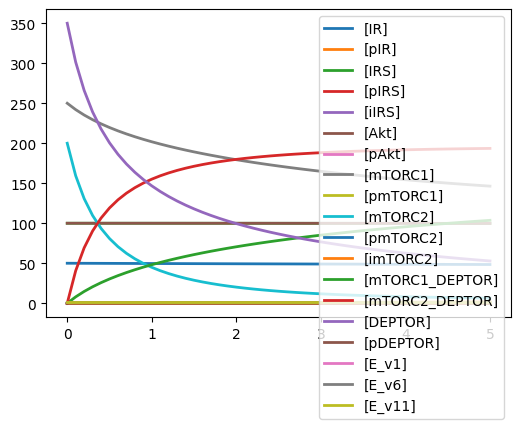

In [11]:
# Run a roadrunner simulation
data = CTLSB_MTOR.roadrunner.simulate()
CTLSB_MTOR.roadrunner.plot(data)

In [12]:
data["[mTORC1_DEPTOR]"]

array([  0.        ,   7.97532982,  14.7191928 ,  20.56435158,
        25.72431556,  30.34421456,  34.52710545,  38.3488255 ,
        41.86680017,  45.12556396,  48.16036366,  50.99958587,
        53.66641385,  56.18005153,  58.55658426,  60.80961988,
        62.95078537,  64.99010285,  66.936262  ,  68.79684466,
        70.57852069,  72.287191  ,  73.92809631,  75.50591458,
        77.02484404,  78.48866653,  79.90079983,  81.26434409,
        82.58212321,  83.85671764,  85.09049184,  86.28561555,
        87.44408769,  88.56775205,  89.65831557,  90.71736128,
        91.74636059,  92.74668311,  93.71960566,  94.66632084,
        95.58794761,  96.48553059,  97.36005876,  98.21245276,
        99.04358956,  99.85428665, 100.64532258, 101.41742622,
       102.17129103, 102.90757195, 103.62689156])

## Methods

In [13]:
# Change the simulation time
CTLSB_MTOR.setTime(2)
CTLSB_MTOR.state_ser

IR                49.332441
pIR                0.667559
IRS               99.955594
pIRS               0.044387
iIRS               0.000019
Akt               99.962699
pAkt               0.037301
mTORC1           179.420965
pmTORC1            0.000516
mTORC2            20.129460
pmTORC2            0.027063
imTORC2            0.000000
mTORC1_DEPTOR     70.578519
mTORC2_DEPTOR    179.843478
DEPTOR            99.575753
pDEPTOR            0.002250
E_v1               1.000000
E_v6               1.000000
E_v11              1.000000
dtype: float64

A state space representation has the form:
* $\dot{{\bf x}} = {\bf A} {\bf x} + {\bf B} {\bf u}$
* ${\bf y} = {\bf C} {\bf x}$

Below is described the elements of this representation for SBML models. 
This is displayed as 4 sub-matrics: ${\bf A}$ is upper left, ${\bf B}$ is upper right, ${\bf C}$ is lower left, and ${\bf D}$ is lower right.

In [14]:
# Create a state space model using the Jacobian at the current time
state_space = CTLSB_SIMPLE.makeStateSpace()
state_space

StateSpace(array([[  0.,   0.,   0.],
       [-10.,  -1.,   0.],
       [ 10.,   1.,   0.]]), array([[1.],
       [0.],
       [0.]]), array([[0., 0., 1.]]), array([[0.]]))

In [15]:
# Create a NonlinearIOSystem object that can be used in creating InterconnectedSystems
# An effector_dct maps the input (a reaction flux) to a chemical species that can be manipulated
effector_dct = {"v1": "IR", "v11": "DEPTOR"}
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor", effector_dct=effector_dct)

# Other Objects and Functions

In [16]:
## Simulating a system
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor")
# Simulate the system using as it is specified in the simulation. Note the warning messages.
ts = ctl.simulateSystem(non_linear_mtor)

In [17]:
# The output is a Timeseries. This is a dataframe where the index is time in milliseconds
ts.head()

,mTORC1_DEPTOR,mTORC2_DEPTOR
miliseconds,,
0,0.000000,0.000000
100,7.976157,40.628459
200,14.719632,69.207782
300,20.563649,90.233766
400,25.726132,106.393547


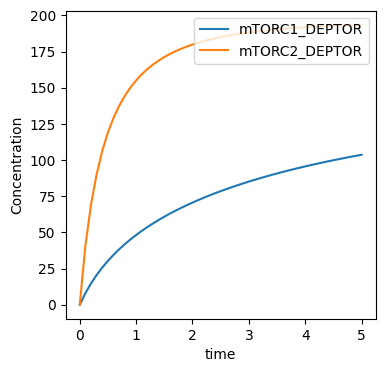

In [18]:
# We can plot any Timeseries object. Various options are available for the plot
ctl.plotOneTS(ts, ylabel="Concentration", figsize=(4,4))

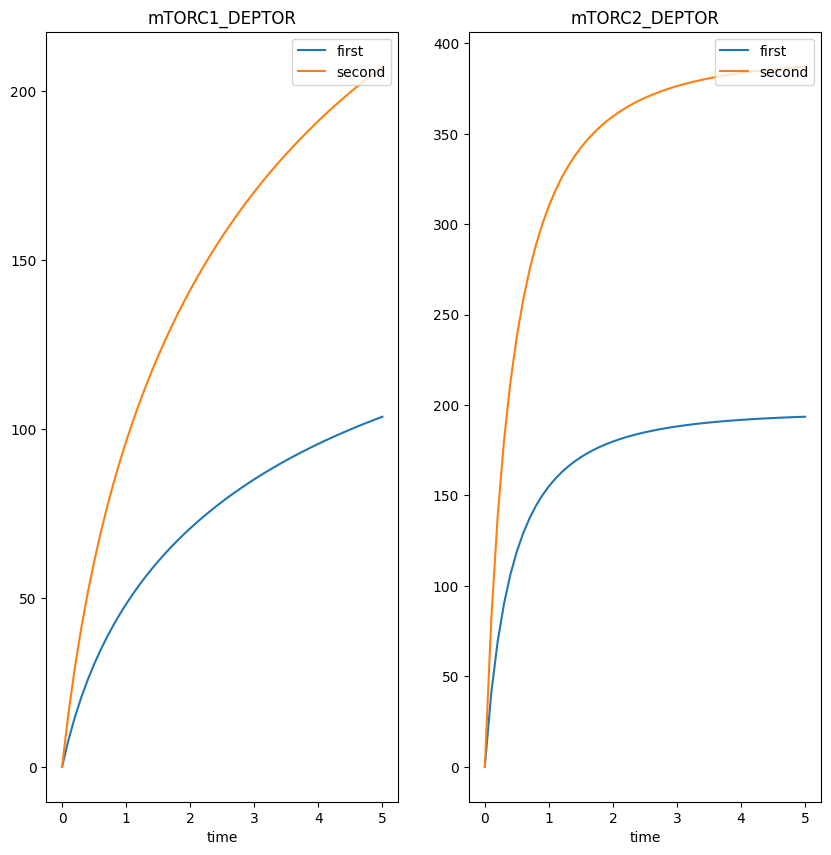

In [19]:
# We can also plot multiple Time Series
df = ts.copy()  # Create a DataFrame from the Timeseries
for col in df.columns:
    df[col] = 2*ts[col]  # Create new values in the DataFrame
ts2 = ctl.Timeseries(df)  # Make a Timeseries from the DataFrame
ctl.plotManyTS(ts, ts2, ncol=2, names=["first", "second"])

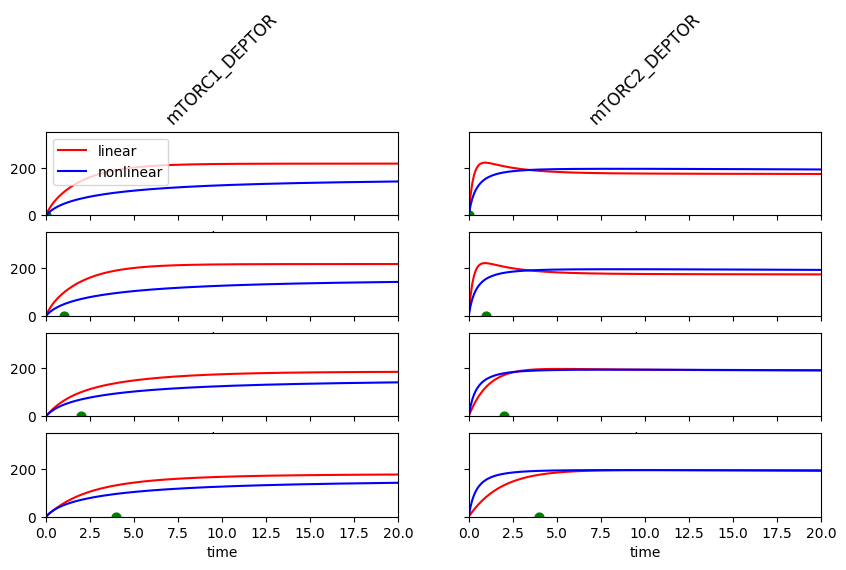

In [20]:
# Compare the linear approximation using the Jacobian at different times with the true model
# The dot on the x-axis shows the timepoint of the Jacobian
CTLSB_MTOR.plotAccuracy(step_val=0, times=[0, 1, 2, 4], figsize=(10, 5), xlabel="time", end_time=20)

# Constructing Feedback Systems

## mTOR System

<img src="images/mTOR-network.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

We use the CalTech ``control`` package to analyze and design control systems.
This is why ``ControlSBML`` has a method to create a ``StateSpace`` object (``makeStateSpace``) and
a ``NonlinearIOSystem`` object (``makeNonlinearIOSystem``).
Below, we show how to construct a PI controller.
To avoid excessive "windup", we hae a threshold on the control error.

In the following, the control objective is to regulate mTORC1_DEPTOR.
This is done b controlling phosphorylated Akt (pAkt),
which has an *inverse* effect on mTORC1_DEPTOR.

The implementation has 3 parts:

* The mTOR system. See ``mtor`` below. This has the input ``v6`` that controls the conversion of pAkt to Akt
and the outputs TORC1_DEPTOR, pAkt.
* The controller, ``controller``. This is a proportional controller that calculates the difference between
the reference value of TORC1_DEPTOR in ``xeq`` and the measured value that is output from ``mtor``.
* The closed loop system, ``closed``, that describes the connections between the mTOR system and the controller.

In [21]:
ctlsb = ctl.ControlSBML(NEW_MTOR,
                       input_names=["E_v11"], output_names=["mTORC1_DEPTOR", "pAkt"])
mtor = ctlsb.makeNonlinearIOSystem("mtor")

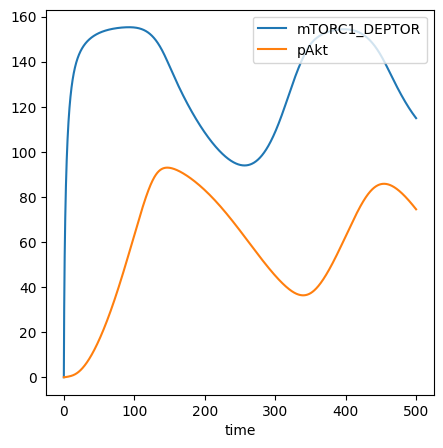

In [22]:
# Uncontrolled system
ctl.plotOneTS(ctl.simulateSystem(mtor, end_time=500), figsize=(5,5))

In [23]:
# State at which system will be regulated
ctlsb.setTime(4.5)
mtor_initial_state = ctlsb.state_ser.values
ctlsb.state_ser

IR                48.555905
pIR                1.444095
IRS               99.784581
pIRS               0.215162
iIRS               0.000258
Akt               99.835887
pAkt               0.164113
mTORC1           150.143164
pmTORC1            0.002549
mTORC2             7.143101
pmTORC2            0.039624
imTORC2            0.000000
mTORC1_DEPTOR     99.854287
mTORC2_DEPTOR    192.817275
DEPTOR            57.322330
pDEPTOR            0.006108
E_v1               1.000000
E_v6               1.000000
E_v11              1.000000
dtype: float64

## Controller

In [24]:
xeq = [100]  # Desired concentration for mTORC1_DEPTOR
def outfcn(t, x, u, _):
    # State is accumulated error
    new_err = xeq[0] - u[0]
    print(t, x, u)
    return -30*new_err
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

## InterconnectSystem

In [25]:
xeq = [80]  # Desired concentration for mTORC1_DEPTOR
last_times = [0]
def outfcn(t, x, u, _):
    # State is accumulated error
    new_err = xeq[0] - u[0]
    output = 0.01*new_err
    if t > last_times[0] + 10:
        last_times[0] = t
        print(t, x, u, output)
    return output
    
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

In [26]:
# Create the closed loop system
closed_outputs = list(mtor.outlist)
closed_outputs.append('controller.out')
#closed_outputs.append("controller.out")  # Make this visible as well
mtor_closed = control.interconnect(
  [mtor, controller],       # systems
  connections=[
    ['mtor.E_v11', 'controller.out'],
    ['controller.in',  'mtor.mTORC1_DEPTOR'],
  ],
  inplist=["controller.in"],
  outlist=closed_outputs,
)

10.21037336066504 [] [0.] 0.8
20.263572696969785 [] [0.] 0.8
30.274404990271577 [] [0.] 0.8
40.57638876046814 [] [0.] 0.8


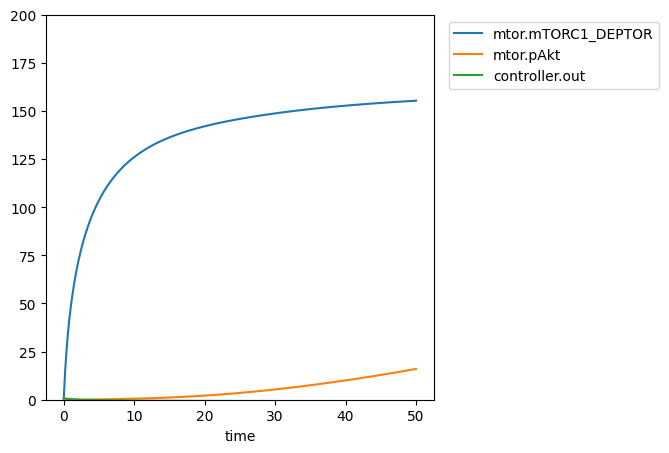

In [27]:
initial_x_vec = ctl.makeStateVector(mtor_closed)
ts = ctl.simulateSystem(mtor_closed, output_names=closed_outputs, initial_x_vec=initial_x_vec, end_time=50)
ctl.plotOneTS(ts, figsize=(5,5), legend_crd=(1.6, 1), ylim=[0, 200])

Recall that the uncontrolled system had mTORC1_DEPTOR equal to 150. The closed loop system regulates this to 100, as desired.

## Notes and Comments

Some considerations in control analysis:
* Choose appropriate inputs regulate in the system under control and appropriate effectors for those inputs.
* Make sure that you use the correct directional change for how the control error impacts the measured output.
If the closed loop system is unstable, you likely have used the wrong direction.
* If you use the state update function (``updfcn``), remember that the output is the derivative of the new state.

# Transfer Functions

In [28]:
# A transfer function has a single input and a single output
ctlsb = ctl.ControlSBML(NEW_MTOR,
    input_names=["E_v11"], 
    output_names=["mTORC1_DEPTOR"])
tf = ctlsb.makeTransferFunction()

In [29]:
type(tf)

control.xferfcn.TransferFunction

In [30]:
tf

TransferFunction(array([-1.06581410e-14, -9.23705556e-14, -1.84741111e-13, -1.45661261e-13,
       -4.70734562e-14, -7.32747196e-15, -4.82253126e-16, -1.49619900e-17,
       -2.13452303e-19, -1.13089723e-21,  7.39498080e-38,  1.81707956e-54,
        2.09551000e-73,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), array([1.00000000e+00, 1.15939095e+01, 4.09836267e+01, 4.85164416e+01,
       2.49064754e+01, 5.68577931e+00, 5.04296083e-01, 1.97901595e-02,
       3.49384112e-04, 2.27291024e-06, 8.02897752e-22, 7.07312857e-39,
       9.80071712e-57, 9.30269423e-75, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [31]:
tf.pole()

array([-5.99999615e+00+0.000000e+00j, -3.96034236e+00+0.000000e+00j,
       -5.71428571e-01+0.000000e+00j, -5.01657639e-01+0.000000e+00j,
       -4.28571428e-01+0.000000e+00j, -5.88235294e-02+0.000000e+00j,
       -3.30898590e-02+0.000000e+00j, -1.99999993e-02+0.000000e+00j,
       -2.00000007e-02+0.000000e+00j, -3.44242947e-16+0.000000e+00j,
       -7.55922197e-18+0.000000e+00j, -7.22201856e-19+6.016573e-22j,
       -7.22201856e-19-6.016573e-22j,  0.00000000e+00+0.000000e+00j,
        0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
        0.00000000e+00+0.000000e+00j,  0.00000000e+00+0.000000e+00j,
        0.00000000e+00+0.000000e+00j])

In [32]:
tf.dcgain()

nan

# Feedback Control Example

This example explores the use of feedback control to regulate the concentration of pyruvate in
a model of glycolytic oscillations (BioModels 206).

Pyruvate is ``s5`` in the model.
It is regulated using ATP, species ``at`` in the model.

In [33]:
CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml",
                       input_names=["at"])

Below is the behavior of the unregulated system.
Note the oscillations in ``s5``.

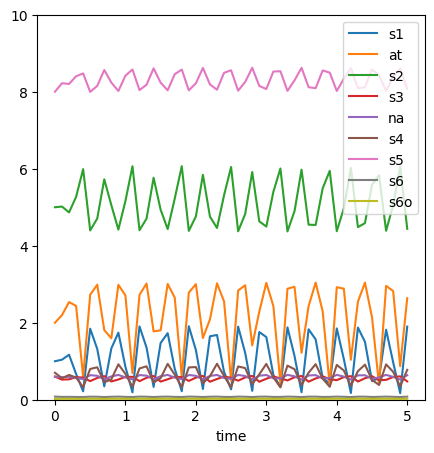

In [34]:
CTLSB.plotTrueModel(ylim=[0, 10], figsize=(5,5))

For this example, we regulate ``s5``.
We want to eliminate the oscillations from ``s5``, and we want it to coverge to 6.
Currently, it's average value is approximately 8.

Our first step is to construct a ``ControlSBML`` object for this model.

In [35]:
URL_206 = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
CTLSB = ctl.ControlSBML(URL_206, input_names=["at"], output_names=["s5"])
sys = CTLSB.makeNonlinearIOSystem("sys")

Next, we construct a proportional controller.

In [36]:
ref = [6]  # Desired value of pyruvate (s5)
def outfcn(t, x, u, _):
    result = -1*(ref - u)
    #print(t, x, u, result)
    return result
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

We form a closed loop system so that the output of the glycolytic system, ``sys.s5``, is
the input the the controller, ``controller.in``.
And, the output of the controller, ``controller.out``, is the input the glycolytic system.

In [37]:
# Create the closed loop system
closed = control.interconnect(
  [sys, controller],       # systems
  connections=[
    ['sys.at', 'controller.out'],
    ['controller.in',  'sys.s5'],
  ],
  inplist=["controller.in"],
  outlist=["sys.s5"],
)

Now, we simulate the closed loop system.
Note that we have eliminated oscillations, and ``s5`` converges to 6.

In [ ]:
times = [0.1*v for v in range(5)]  # Times at which simulations are done
result = control.input_output_response(closed, times, X0=ctl.makeStateVector(closed))

ser = ctl.mat2DF(result.outputs, row_names=times)
_, ax = plt.subplots(1, figsize=(5,2))
ax.plot(ser.index, ser.values)
ax.set_ylim([0, 10])
ax.set_xlabel("time")
_ = ax.set_title("Controlled")
_ = ax.legend(["s5"], fontsize=14)

We see that the control system has achieved its objectives.